In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow-gpu==1.15.0
!pip install keras==2.0.8

     |████████████████████████████████| 411.5 MB 7.9 kB/s 
     |████████████████████████████████| 50 kB 7.3 MB/s 
     |████████████████████████████████| 503 kB 48.9 MB/s 
     |████████████████████████████████| 3.8 MB 38.1 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=51bbaca416d8b4369cdbc798b79667cace4a2697d01bd232b47f42b17bea7220
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succe

In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
print(tf.__version__)
print(keras.__version__)

1.15.0
2.2.4-tf


In [4]:
train_cats_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/train/cats"
train_dogs_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/train/dogs"
test_cats_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/test/cats"
test_dogs_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/test/dogs"
validation_cats_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/validation/cats"
validation_dogs_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/validation/dogs"

In [5]:
print('Total number of cat images for training:',len(os.listdir(train_cats_dir)))
print('Total number of dog images for training:',len(os.listdir(train_dogs_dir)))
print('Total number of cat images for test:',len(os.listdir(test_cats_dir)))
print('Total number of dog images for test:',len(os.listdir(test_dogs_dir)))
print('Total number of cat images for validation:',len(os.listdir(validation_cats_dir)))
print('Total number of dog images for validation:',len(os.listdir(validation_dogs_dir)))

Total number of cat images for training: 1000
Total number of dog images for training: 1000
Total number of cat images for test: 250
Total number of dog images for test: 250
Total number of cat images for validation: 250
Total number of dog images for validation: 250


In [6]:
from keras.applications import ResNet50
myResNet=ResNet50(weights='imagenet',
                 include_top=False,
                 input_shape=(224,224,3))

Using TensorFlow backend.







92545024/94653016 [============================>.] - ETA: 0sWARNING:tensorflow:From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:153: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.







In [7]:
myResNet.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        input_1[0][0]                    
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 112, 112, 64)  0           bn_conv1[0][0]                   
___________________________________________________________________________________________

In [8]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(myResNet)
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [10]:
train_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/train"
test_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/test"
validation_dir="/content/drive/MyDrive/deepLearning/dogs_and_cats/dataset/validation"

In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/30
100/100 [==============================] - 404s - loss: 0.2527 - acc: 0.8955 - val_loss: 0.9809 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 104s - loss: 0.1028 - acc: 0.9635 - val_loss: 1.7590 - val_acc: 0.5030
Epoch 3/30
100/100 [==============================] - 104s - loss: 0.0795 - acc: 0.9685 - val_loss: 1.0264 - val_acc: 0.4950
Epoch 4/30
100/100 [==============================] - 104s - loss: 0.0636 - acc: 0.9770 - val_loss: 0.7272 - val_acc: 0.5270
Epoch 5/30
100/100 [==============================] - 103s - loss: 0.0583 - acc: 0.9815 - val_loss: 0.9020 - val_acc: 0.5250
Epoch 6/30
100/100 [==============================] - 104s - loss: 0.0399 - acc: 0.9860 - val_loss: 1.1805 - val_acc: 0.5920
Epoch 7/30
100/100 [==============================] - 104s - loss: 0.0290 - acc: 0.9900 - val_loss: 1.7311 - val_acc: 0.6710
Epoch

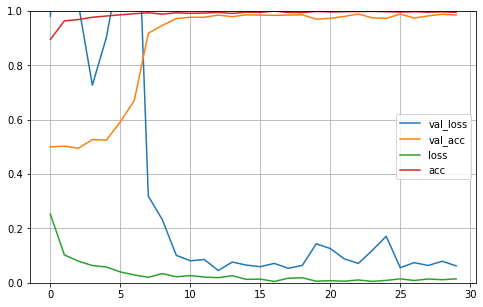

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

Found 500 images belonging to 2 classes.


In [16]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.9899999976158143
